In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

mobiles = pd.read_csv(r"C:\Users\2600\Desktop\K-Youth\Python\Homework\mobiles.csv") #Import datafile 
mobiles.head(3)

,Unnamed: 0,Brand,Title,Model Name,Model Number,Price,Rating,No_of_Ratings,No_of_Reviews,In The Box,...,Sensors,Browser,Other Features,GPS Type,Video Formats,Battery Capacity,Width,Height,Depth,Weight
0,0,APPLE,"APPLE iPhone 13 (Pink, 128 GB)",iPhone 13,MLPH3HN/A,52499,4.7,259109.0,12745.0,"iPhone, USB-C to Lightning Cable, Documentation",...,"Face ID, Barometer, Three‑axis Gyro, Accelerom...",Safari,"Splash, Water and Dust Resistant IP68 Rated (M...","Built-in GPS, GLONASS, Galileo, QZSS and BeiDou","HEVC, H.264, MPEG‑4 Part 2 and Motion JPEG, HD...",3240 mAh,71.5 mm,146.7 mm,7.65 mm,173 g
1,1,POCO,"POCO C51 (Power Black, 64 GB)",C51,MZB0E6DIN,6499,4.1,78642.0,4449.0,"Handset, 10W Adapter, USB Cable, Sim Eject Too...",...,"Accelerometer, Fingerprint Sensor",Google Chrome,"Splash Resistant Coating, MIUI Dialer, Upto 3 ...","GPS, AGPS, GLONASS, BEIDOU",NaN,5000 mAh,76.75 mm,164.9 mm,9.09 mm,192 g
2,2,OnePlus,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 128 GB)",Nord CE 2 Lite 5G,CPH2381/CVD,17196,4.4,110949.0,7728.0,"Phone,SIM Tray Ejector, Adapter, Phone Case, U...",...,"Accelerometer, Fingerprint Sensor",Google Chrome,"Splash Resistant Coating, MIUI Dialer, Upto 3 ...","GPS, AGPS, GLONASS, BEIDOU",NaN,5000 mAh,76.75 mm,164.9 mm,9.09 mm,192 g


In [2]:
mobiles.shape #To get understanding on how big the data is 

(984, 74)

In [3]:
mobiles.columns #checking which columns can be useful for comparison

Index(['Unnamed: 0', 'Brand', 'Title', 'Model Name', 'Model Number', 'Price',
       'Rating', 'No_of_Ratings', 'No_of_Reviews', 'In The Box', 'Color',
       'Browse Type', 'SIM Type', 'Hybrid Sim Slot', 'Touchscreen',
       'OTG Compatible', 'Quick Charging', 'Sound Enhancements',
       'Display_size_cm', 'Display_size_inches', 'Resolution',
       'Resolution Type', 'Display Type', 'Other Display Features',
       'Operating System', 'Processor Type', 'Processor Core',
       'Operating Frequency', 'Internal Storage', 'Primary Camera Available',
       'Primary Camera', 'Primary Camera Features',
       'Secondary Camera Available', 'Secondary Camera',
       'Secondary Camera Features', 'Flash', 'HD Recording',
       'Full HD Recording', 'Video Recording', 'Video Recording Resolution',
       'Digital Zoom', 'Frame Rate', 'Dual Camera Lens', 'Call Wait/Hold',
       'Network Type', 'Supported Networks', 'Internet Connectivity', '3G',
       'Pre-installed Browser', 'Bluetooth Su

In [4]:
mobiles.isna().mean().sort_values(ascending=False) #To find the % of missing value for every column

Mobile Tracker           0.907520
EDGE                     0.821138
Pre-installed Browser    0.776423
Sound Enhancements       0.750000
3G                       0.645325
                           ...   
Browse Type              0.000000
Display_size_cm          0.000000
Display_size_inches      0.000000
Brand                    0.000000
Unnamed: 0               0.000000
Length: 74, dtype: float64

In [5]:
over_80 = [] #Columns with missing detail above 80%
under_80 = [] #Columns with missing detail under 80%
missing = mobiles.isna().mean().sort_values(ascending=False)
for i in missing : 
    if i > 0.80 :
        over_80.append(i)
    elif i <= 80 and i>0 :
        under_80.append(i)
over_80

[0.907520325203252, 0.8211382113821138]

In [6]:
mobiles.fillna('No Detail',inplace=True) #Fill the missing detail with 'No detail'

In [22]:
Columns_to_drop = ['Mobile Tracker','EDGE'] #Drop columns with missing detail above 80%
mobiles.drop(columns=Columns_to_drop)

,Unnamed: 0,Brand,Title,Model Name,Model Number,Price,Rating,No_of_Ratings,No_of_Reviews,In The Box,...,Sensors,Browser,Other Features,GPS Type,Video Formats,Battery Capacity,Width,Height,Depth,Weight
0,0,APPLE,"APPLE iPhone 13 (Pink, 128 GB)",iPhone 13,MLPH3HN/A,52499,4.7,259109.0,12745.0,"iPhone, USB-C to Lightning Cable, Documentation",...,"Face ID, Barometer, Three‑axis Gyro, Accelerom...",Safari,"Splash, Water and Dust Resistant IP68 Rated (M...","Built-in GPS, GLONASS, Galileo, QZSS and BeiDou","HEVC, H.264, MPEG‑4 Part 2 and Motion JPEG, HD...",3240 mAh,71.5 mm,146.7 mm,7.65 mm,173 g
1,1,POCO,"POCO C51 (Power Black, 64 GB)",C51,MZB0E6DIN,6499,4.1,78642.0,4449.0,"Handset, 10W Adapter, USB Cable, Sim Eject Too...",...,"Accelerometer, Fingerprint Sensor",Google Chrome,"Splash Resistant Coating, MIUI Dialer, Upto 3 ...","GPS, AGPS, GLONASS, BEIDOU",No Detail,5000 mAh,76.75 mm,164.9 mm,9.09 mm,192 g
2,2,OnePlus,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 128 GB)",Nord CE 2 Lite 5G,CPH2381/CVD,17196,4.4,110949.0,7728.0,"Phone,SIM Tray Ejector, Adapter, Phone Case, U...",...,"Accelerometer, Fingerprint Sensor",Google Chrome,"Splash Resistant Coating, MIUI Dialer, Upto 3 ...","GPS, AGPS, GLONASS, BEIDOU",No Detail,5000 mAh,76.75 mm,164.9 mm,9.09 mm,192 g
3,3,realme,"realme 11x 5G (Purple Dawn, 128 GB)",11x 5G,RMX3785,15999,4.3,2633.0,220.0,"Handset, Adapter, USB Cable, Important Info Bo...",...,"Magnetic Induction Sensor, Light Sensor, Proxi...",No Detail,"COG Sealing Process, In-Cell Touch Panel Techn...","GPS, AGPS, BEIDOU, GALILEO, GLONASS","MP4, 3GP, ASF, AVI, FLV, M2TS, MKV, MPG, TS, W...",5000 mAh,76 mm,165.7 mm,7.89 mm,190 g
4,4,realme,"realme 11x 5G (Midnight Black, 128 GB)",11x 5G,RMX3785,14999,4.4,13807.0,988.0,"Handset, Adapter, USB Cable, Important Info Bo...",...,"Magnetic Induction Sensor, Light Sensor, Proxi...",No Detail,"COG Sealing Process, In-Cell Touch Panel Techn...","GPS, AGPS, BEIDOU, GALILEO, GLONASS","MP4, 3GP, ASF, AVI, FLV, M2TS, MKV, MPG, TS, W...",5000 mAh,76 mm,165.7 mm,7.89 mm,190 g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,979,APPLE,"APPLE iPhone 12 (White, 128 GB)",iPhone 12,MGJC3HN/A,51999,4.6,190693.0,12872.0,"iPhone, USB-C to Lightning Cable, Documentation",...,"Face ID, Barometer, Three‑axis Gyro, Accelerom...",Safari,"Splash, Water and Dust Resistant (Rated IP68 (...","Built-in GPS, GLONASS, Galileo, QZSS and BeiDou","HEVC, H.264, MPEG‑4 Part 2 and Motion JPEG, HD...",4500 mAh,71.5 mm,146.7 mm,7.4 mm,162 g
980,980,Tecno,"Tecno Pova 3 (Tech Silver, 128 GB)",Pova 3,LF7,13999,4.1,522.0,24.0,"Handset, USB Cable, Charger, User Guide, SIM E...",...,"Fingerprint Sensor (side-mounted), G-Sensor, A...",Google Chrome,"Memory Fusion 2.1, 4D Vibration & Z-axis Linea...",No Detail,No Detail,7000 mAh,78.46 mm,173.1 mm,9.44 mm,No Detail
981,981,REDMI,"REDMI Note 11 SE (Thunder Purple, 64 GB)",Note 11 SE,MZB0CK8IN,12890,4.3,47843.0,2894.0,"Handset, USB Type-C Cable, Sim Eject Tool, Pro...",...,"Accelerometer, Fingerprint Sensor, Gyro Sensor...",Google Chrome,No Detail,"GPS, AGPS, GLONASS, BEIDOU",No Detail,5000 mAh,74.5 mm,160.46 mm,8.29 mm,178.8 g
982,982,vivo,"vivo Y16 (Steller Black, 64 GB)",Y16,V2204 | V2214,10699,4.2,2908.0,152.0,"Handset, Documentation, Type-C to USB Cable, U...",...,"Accelerometer, Ambient Light Sensor, Proximity...",Google Chrome,"10W Fast Charging, Handset Material: Plastic","GPS, BEIDOU, GLONASS, GALILEO","MP4, 3GP, AVI, TS, MKV, FLV",5000 mAh,75.55 mm,163.95 mm,8.19 mm,183 g


In [7]:
list_of_brands = mobiles["Brand"].unique()
list_of_brands

array(['APPLE', 'POCO', 'OnePlus', 'realme', 'vivo', 'MOTOROLA', 'REDMI',
       'Infinix', 'Nokia', 'SAMSUNG', 'OPPO', 'Micromax', 'MarQ', 'LAVA',
       'Google', 'itel', 'Kechaoda', 'HOTLINE', 'Tecno', 'KARBONN', 'I',
       'GFive', 'DIZO', 'Snexian', 'Good', 'Eunity', 'Energizer', 'IAIR',
       'Cellecor', 'IQOO', 'Xiaomi', 'MTR', 'Nothing', 'Mi', 'SAREGAMA',
       'Peace', 'UiSmart', 'Itel'], dtype=object)

In [11]:
rupeetomyr=0.057 #To see how much the model cost in MYR 
mobiles['PriceMYR'] = mobiles.Price.apply(lambda x : x*rupeetomyr)
mobiles[['Brand','Model Name','Price','PriceMYR']]

,Brand,Model Name,Price,PriceMYR
0,APPLE,iPhone 13,52499,2992.443
1,POCO,C51,6499,370.443
2,OnePlus,Nord CE 2 Lite 5G,17196,980.172
3,realme,11x 5G,15999,911.943
4,realme,11x 5G,14999,854.943
...,...,...,...,...
979,APPLE,iPhone 12,51999,2963.943
980,Tecno,Pova 3,13999,797.943
981,REDMI,Note 11 SE,12890,734.730
982,vivo,Y16,10699,609.843


In [12]:
round(mobiles.Price.describe()) #To get more details on price data

count       984.0
mean      19280.0
std       26030.0
min         597.0
25%        2098.0
50%       11634.0
75%       21999.0
max      199900.0
Name: Price, dtype: float64

In [13]:
max_min =  mobiles.iloc[[442, 721], [1,3,5,6,11,30,69,71,72,73]] #Comparison of the most expensive phone and the cheapest phone in the market 
max_min

,Brand,Model Name,Price,Rating,Browse Type,Primary Camera,Battery Capacity,Height,Depth,Weight
442,APPLE,Iphone 15 Pro Max,199900,4.8,Smartphones,48MP + 12MP + 12MP,4980 mAh,159.9 mm,8.25 mm,221 g
721,Eunity,U1 310,597,3.1,Feature Phones,0.3MP Rear Camera,1000 mAh,147.5 mm,7.85 mm,206 g


In [15]:
def check_check(browse_type):  #function to check different meaning of the phone type
    phone = {'Smartphones' :'Modern Phone',
                     'Features Phones' : 'Traditional Phone'}
    try : 
        return phone[browse_type]
    except : 
        return 'Not available'
check_check('Features Phones')

'Traditional Phone'

In [3]:
iphone12 = mobiles.Price[207]
max_range_of_average_indian_wage = 143000  #Indian wages according to glassdoor website 
min_range_of_average_indian_wage = 8000
average_indian_wage = (max_range_of_average_indian_wage + min_range_of_average_indian_wage)/2
round(average_indian_wage/(iphone12),2) #To find how many month need to save in order to buy Iphone 12 

1.54

In [80]:
average_malaysian_wage = 3000
Iphone12malaysia = 3099
Iphone12malaysia/average_malaysian_wage #How many month needed for malaysian to save to buy Iphone 12 

1.033

In [79]:
mobiles[['Brand','Model Name','Price','Rating']].sort_values(by='Price',ascending=False) #Check price
    

,Brand,Model Name,Price,Rating
442,APPLE,Iphone 15 Pro Max,199900,4.8
674,APPLE,Iphone 15 Pro Max,179900,4.8
809,APPLE,Iphone 15 Pro Max,179900,4.8
184,APPLE,Iphone 15 Pro Max,159900,4.8
909,APPLE,Iphone 15 Pro Max,159900,4.8
...,...,...,...,...
616,Snexian,GURU 312,630,3.3
358,Snexian,GURU 312,630,3.3
920,Snexian,GURU 2173,630,3.9
721,Eunity,U1 310,597,3.1


In [78]:
mobiles[['Brand','Model Name','Price','Rating']].sort_values(by='Rating',ascending=False) #Check rating


,Brand,Model Name,Price,Rating
80,Infinix,Smart 7 HD,6199,5.0
269,POCO,X5 5G,16999,4.9
894,SAREGAMA,Carvaan Mobile Bhakti Don Lite M23 with 351 pr...,1899,4.9
641,Tecno,Pop 7 pro,7199,4.8
674,APPLE,Iphone 15 Pro Max,179900,4.8
...,...,...,...,...
414,Eunity,U1 310,597,3.1
721,Eunity,U1 310,597,3.1
756,HOTLINE,CLASSIC,649,2.9
824,HOTLINE,CLASSIC,649,2.9


In [52]:
revenue_per_brand = mobiles.groupby("Brand")['Price'].sum().sort_values(ascending=False) #revenue per brand 
revenue_per_brand

Brand
APPLE        7244037
realme       1579264
SAMSUNG      1523575
REDMI        1437776
OnePlus      1247836
vivo          977712
Infinix       903824
MOTOROLA      897302
POCO          769034
OPPO          539266
Tecno         374929
Google        263994
IQOO          259280
Nothing       185996
itel          142840
Xiaomi        140987
Nokia         108902
Mi             86478
Kechaoda       60866
LAVA           50989
I              41596
KARBONN        25303
Micromax       24825
Snexian        14891
SAREGAMA       14349
Good           10894
DIZO            7348
Cellecor        5581
MTR             5400
MarQ            5244
UiSmart         4848
IAIR            3896
GFive           3547
HOTLINE         3243
Itel            2380
Energizer       1349
Eunity          1194
Peace            749
Name: Price, dtype: int64

Text(0.5, 1.0, 'Mobiles Market')

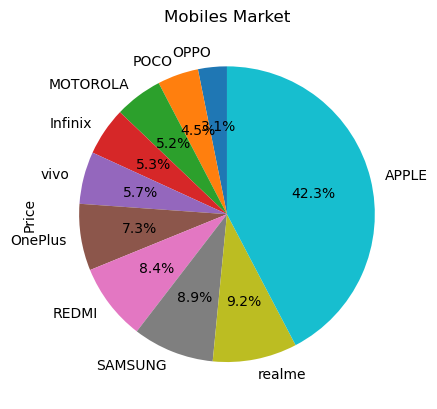

In [75]:
Mobiles_market = mobiles.groupby("Brand")['Price'].sum().sort_values(ascending=True).tail(10)
Mobiles_market.plot(kind='pie', autopct='%1.1f%%', startangle=90) #mobile market using pie chart 
plt.title ('Mobiles Market')

In [87]:
total = mobiles['Brand'].value_counts().sort_values(ascending=False).head(3) #Check how many sales per brand
total

REDMI     97
APPLE     88
realme    88
Name: Brand, dtype: int64

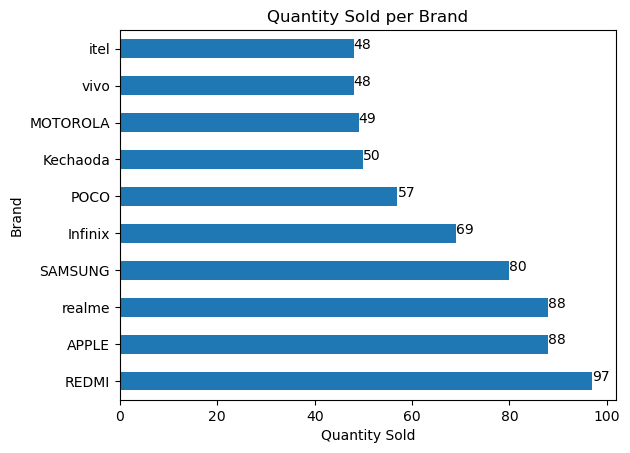

In [73]:
quantity_brand = mobiles['Brand'].value_counts().head(10) #pie chart for amount sold per model
ax = quantity_brand.plot(kind='barh')
for i, v in enumerate(quantity_brand):
    ax.text(v, i,str(v)) #put number for each bar 
plt.xlabel('Quantity Sold')
plt.ylabel('Brand')
plt.title('Quantity Sold per Brand')
plt.show()